# 3.2. Korelacja danych

Istnieją matematyczne miary współzależności dwóch zmiennych. Dzięki nim jesteśmy w stanie określić wzajemne powiązania naszego zbioru danych. Umożliwiają one wczesne wykrycie obiecujących zmiennych skorelowanych z wartością, którą chcemy modelować bądź też par cech, które wzajemnie wnoszą tę samą informację. W drugim przypadku możemy rozważyć pozostawienie jedynie reprezentata grupy powiązanych ze sobą zmiennych, jako że zawsze preferujemy modele jak najprostsze.

Co ważne, **korelacja nie oznacza związku przyczynowo-skutkowego**!

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset_df = pd.DataFrame({
    "x": np.linspace(0, 2 * np.pi, 500)
})
dataset_df

,x
0,0.000000
1,0.012592
2,0.025183
3,0.037775
4,0.050366
...,...
495,6.232819
496,6.245411
497,6.258002
498,6.270594


In [3]:
np.random.seed(2020)

dataset_df = dataset_df \
    .assign(y=2 * dataset_df["x"] + 1) \
    .assign(z=-dataset_df["x"] - 1) \
    .assign(sin_x=np.sin(dataset_df["x"])) \
    .assign(random=np.random.normal(scale=3.0, 
                                    size=500)) \
    .assign(log_x=np.log(dataset_df["x"] + 10e-6))
dataset_df.sample(n=5)

,x,y,z,sin_x,random,log_x
35,0.440704,1.881409,-1.440704,0.426577,-0.646881,-0.819358
431,5.426960,11.853919,-6.426960,-0.755375,-3.759041,1.691381
486,6.119495,13.238990,-7.119495,-0.162960,-0.942390,1.811481
328,4.130030,9.260059,-5.130030,-0.835167,-0.548558,1.418287
37,0.465887,1.931775,-1.465887,0.449216,0.294167,-0.763790


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016BBE8CBAC8>],
      dtype=object)

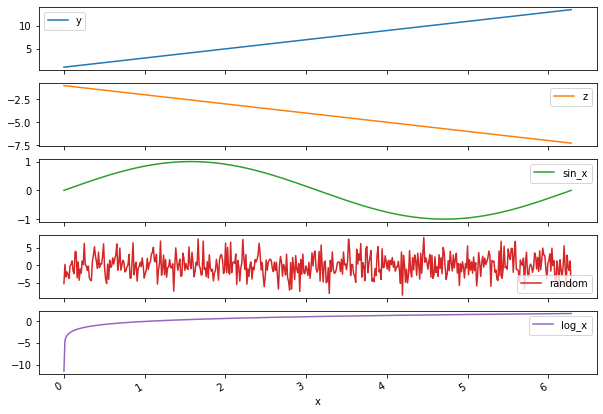

In [4]:
dataset_df.plot(figsize=(10.0, 7.5), x="x", 
                subplots=True, layout=(5, 1))

## Współczynnik korelacji liniowej Pearsona

Najczęściej używanym współczynnikiem korelacji jest współczynnik korelacji liniowej Pearsona. Pozwala on na wykrycie zależności liniowych dla pary zmiennych. Estymator tego współczynnika definiuje się w następujący sposób:

$$ {\displaystyle r_{xy}={\frac {\sum _{i=1}^{n}(x_{i}-{\overline {x}})(y_{i}-{\overline {y}})}{{\sqrt {\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}}}{\sqrt {\sum _{i=1}^{n}(y_{i}-{\overline {y}})^{2}}}}},} $$

$ x $ i $ y $ to zmienne, dla których współczynnik liczymy, a $ \overline{x} $ oraz $ \overline{y} $ to odpowiednie wartości średnie dla nich.

W pandas możemy łatwo obliczyć współczynnik korelacji dla wszystkich par zmiennych jakie posiadamy.

In [5]:
dataset_df.corr()

,x,y,z,sin_x,random,log_x
x,1.000000,1.000000,-1.000000,-0.777350,0.016248,0.799246
y,1.000000,1.000000,-1.000000,-0.777350,0.016248,0.799246
z,-1.000000,-1.000000,1.000000,0.777350,-0.016248,-0.799246
sin_x,-0.777350,-0.777350,0.777350,1.000000,-0.013599,-0.489557
random,0.016248,0.016248,-0.016248,-0.013599,1.000000,0.051965
log_x,0.799246,0.799246,-0.799246,-0.489557,0.051965,1.000000


Zarówno wartości $ -1 $ oraz $ 1 $ oznaczają idealną korelację, jednak inny jej kierunek. Ujemna wartość korelacji oznacza, że wraz ze wzrostem wartości jednej zmiennej, wartość drugiej spada. Jeśli korelacja jest dodatnia, to obie wartości zmieniają swoją wartość równolegle w tym samym kierunku.

Nie ma jednej słusznej definicji mocnej i słabej korelacji - w niektórych dziedzinach wartość $ 0.3 $ będzie uznawana za istotną, a np. w fizyce $ 0.9 $ może być za mała.

## Problemy z korelacją

Wartości korelacji mogą być czasem mylące i warto znać szerszy kontekst, aby dobrze zrozumieć dane zjawiska. Ponadto, statystyczna korelacja niekoniecznie oznacza korelację praktyczną.

![](images/3_2_nicolas_cage_corr.png)

*Źródło: https://tylervigen.com/view_correlation?id=359*

## Inne metody liczenia koleracji

Istnieją jeszcze inne metody liczenia współczynnika korelacji i niektóre z nich są z automatu dostarczone przez pandas.

### Korelacja rang Spearman'a

In [6]:
dataset_df.corr(method="spearman")

,x,y,z,sin_x,random,log_x
x,1.000000,1.000000,-1.000000,-0.748503,0.028816,1.000000
y,1.000000,1.000000,-1.000000,-0.748503,0.028816,1.000000
z,-1.000000,-1.000000,1.000000,0.748503,-0.028816,-1.000000
sin_x,-0.748503,-0.748503,0.748503,1.000000,-0.018555,-0.748503
random,0.028816,0.028816,-0.028816,-0.018555,1.000000,0.028816
log_x,1.000000,1.000000,-1.000000,-0.748503,0.028816,1.000000


### Korelacja Kendall Tau

In [7]:
dataset_df.corr(method="kendall")

,x,y,z,sin_x,random,log_x
x,1.000000,1.000000,-1.000000,-0.498998,0.018998,1.000000
y,1.000000,1.000000,-1.000000,-0.498998,0.018998,1.000000
z,-1.000000,-1.000000,1.000000,0.498998,-0.018998,-1.000000
sin_x,-0.498998,-0.498998,0.498998,1.000000,-0.011848,-0.498998
random,0.018998,0.018998,-0.018998,-0.011848,1.000000,0.018998
log_x,1.000000,1.000000,-1.000000,-0.498998,0.018998,1.000000
